## Data Overview

In [1]:
# import all the libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import time
from joblib import dump, load 

In [2]:
df = pd.read_csv('craft_demo_sample.csv')

In [3]:
print('The number of records: {}'.format(df.shape[0]))
print('The number of fields: {}'.format(df.shape[1]))

The number of records: 120000
The number of fields: 44


In [4]:
# check data columns and types
print(df.dtypes)

visit_date                     object
visit_start_timestamp          object
hourofday                       int64
dayofweek                       int64
dayofmonth                      int64
monthofyear                     int64
visitor_id                     object
session_num                    object
visitor_session_num             int64
device                         object
operating_system               object
browser                        object
resolution_desc                object
geo_country                    object
region                         object
city                           object
language_desc                  object
connection_type_desc           object
session_duration_second       float64
pages_visited                   int64
visitor_type                   object
customer                        int64
prospect                        int64
employee_size                  object
revenue_size                   object
year_in_business               object
industry    

In [5]:
# describe the numerical variable
df.describe(include=[np.number])

hourofday      dayofweek     dayofmonth  monthofyear  \
count  120000.000000  120000.000000  120000.000000     120000.0   
mean       10.926225       3.925400      15.443858          9.0   
std         4.963306       1.609474       8.836473          0.0   
min         0.000000       1.000000       1.000000          9.0   
25%         7.000000       3.000000       8.000000          9.0   
50%        11.000000       4.000000      15.000000          9.0   
75%        14.000000       5.000000      23.000000          9.0   
max        23.000000       7.000000      30.000000          9.0   

       visitor_session_num  session_duration_second  pages_visited  \
count        120000.000000             96120.000000  120000.000000   
mean            460.309208               141.571036       1.958483   
std           12507.261418               327.173708       3.405440   
min               1.000000                 0.000000       1.000000   
25%               1.000000                 4.000000       1.000000   
50%              11.000000                15.000000       1.000000   
75%              78.000000                55.000000       2.000000   
max          430268.000000              1800.000000      98.000000   

            customer       prospect  login_page_flag  
count  120000.000000  120000.000000    120000.000000  
mean        0.597583       0.402417         0.430833  
std         0.490387       0.490387         0.495195  
min         0.000000       0.000000         0.000000  
25%         0.000000       0.000000         0.000000  
50%         1.000000       0.000000         0.000000  
75%         1.000000       1.000000         1.000000  
max         1.000000       1.000000         1.000000

In [6]:
# describe the categorical variable
df.describe(include=[np.object])

visit_date visit_start_timestamp  \
count       120000                120000   
unique          30                115614   
top     2020-09-09   2020-09-03 11:38:11   
freq          5556                     4   

                                   visitor_id  \
count                                  120000   
unique                                 114901   
top     2278409028376346066917530593693535594   
freq                                      105   

                                      session_num   device operating_system  \
count                                      120000   113661           120000   
unique                                     120000        2               10   
top     3937439725268255744611694149940720271:490  Desktop          Windows   
freq                                            1   103249            76930   

       browser resolution_desc geo_country  region         city  \
count   120000          120000      120000  120000       120000   
unique      25             194         183     641         8686   
top     Chrome     1920 x 1080         usa      ca  santa clara   
freq     85804           33565      104854   18576         2879   

                  language_desc connection_type_desc visitor_type  \
count                    119831               120000       120000   
unique                       98                    2            2   
top     English (United States)             LAN/Wifi       Return   
freq                     112878               112813        87726   

       employee_size revenue_size year_in_business industry annual_revenue  \
count         120000       120000            94290    94290          94290   
unique            14           13                7       20              4   
top            other        other            other    other          other   
freq           72617        72396            70368    61222          94273   

       channel     search_type                 referrer landing_page  \
count   120000           31126                    74242       120000   
unique      10               2                     9244            8   
top        SEO  Organic Search  https://www.google.com/        other   
freq     48560           26052                    40095        78098   

                                             url_sequence care_article_id  \
count                                              120000           21955   
unique                                              45345            6089   
top     https://quickbooks.intuit.com/sign-in-offer/,h...      ooxbu36397   
freq                                                 8474            3000   

                                 care_article_title care_user_click  \
count                                         53868           44867   
unique                                        10684               1   
top     What are usage limits in QuickBooks Online?               Y   
freq                                            844           44867   

       qbo_existing_customer_type qbo_existing_customer_sku qbo_signup_date  \
count                       66287                     66285           66287   
unique                          5                         4            4245   
top                       Buy Now                      Plus      2020-08-31   
freq                        34142                     33333             195   

       qbo_subscription_date qbo_cancel_date qbo_sign_up      qbo_signup_time  
count                  64274            5796      120000                 6050  
unique                  4088             753           1                 6040  
top               2019-02-01      2020-05-01           Y  2020-09-10 11:21:42  
freq                     162              50      120000                    2

In [7]:
# we can only see the slightly correlation between page_visited with session_duration, page_visited with login_page_flag, and login_page_flag with customer
df.corr()

hourofday  dayofweek  dayofmonth  monthofyear  \
hourofday                 1.000000  -0.043068    0.012061          NaN   
dayofweek                -0.043068   1.000000   -0.114597          NaN   
dayofmonth                0.012061  -0.114597    1.000000          NaN   
monthofyear                    NaN        NaN         NaN          NaN   
visitor_session_num      -0.009197  -0.006366   -0.001516          NaN   
session_duration_second  -0.009728  -0.001135   -0.005909          NaN   
pages_visited             0.017867  -0.007915   -0.003161          NaN   
customer                 -0.078106  -0.001293   -0.006710          NaN   
prospect                  0.078106   0.001293    0.006710          NaN   
login_page_flag          -0.031705  -0.005031   -0.000416          NaN   

                         visitor_session_num  session_duration_second  \
hourofday                          -0.009197                -0.009728   
dayofweek                          -0.006366                -0.001135   
dayofmonth                         -0.001516                -0.005909   
monthofyear                              NaN                      NaN   
visitor_session_num                 1.000000                -0.013887   
session_duration_second            -0.013887                 1.000000   
pages_visited                      -0.009048                 0.164764   
customer                            0.028468                -0.000671   
prospect                           -0.028468                 0.000671   
login_page_flag                    -0.024664                 0.043857   

                         pages_visited  customer  prospect  login_page_flag  
hourofday                     0.017867 -0.078106  0.078106        -0.031705  
dayofweek                    -0.007915 -0.001293  0.001293        -0.005031  
dayofmonth                   -0.003161 -0.006710  0.006710        -0.000416  
monthofyear                        NaN       NaN       NaN              NaN  
visitor_session_num          -0.009048  0.028468 -0.028468        -0.024664  
session_duration_second       0.164764 -0.000671  0.000671         0.043857  
pages_visited                 1.000000 -0.066991  0.066991         0.186792  
customer                     -0.066991  1.000000 -1.000000         0.337504  
prospect                      0.066991 -1.000000  1.000000        -0.337504  
login_page_flag               0.186792  0.337504 -0.337504         1.000000

## Variable Analysis

In [8]:
# drop duplicates if any
rows_original = df.shape[0] 
print('Before dropping duplicates, the shape is {}'.format(df.shape))
data_df = df.drop_duplicates()
print('After dropping duplicates, the shape is {}'.format(data_df.shape))
print('There are total {} rows dropped'.format(rows_original - data_df.shape[0]))

Before dropping duplicates, the shape is (120000, 44)
After dropping duplicates, the shape is (120000, 44)
There are total 0 rows dropped


In [9]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})

In [10]:
missing_value_df

percent_missing
visit_date                         0.000000
visit_start_timestamp              0.000000
hourofday                          0.000000
dayofweek                          0.000000
dayofmonth                         0.000000
monthofyear                        0.000000
visitor_id                         0.000000
session_num                        0.000000
visitor_session_num                0.000000
device                             5.282500
operating_system                   0.000000
browser                            0.000000
resolution_desc                    0.000000
geo_country                        0.000000
region                             0.000000
city                               0.000000
language_desc                      0.140833
connection_type_desc               0.000000
session_duration_second           19.900000
pages_visited                      0.000000
visitor_type                       0.000000
customer                           0.000000
prospect                           0.000000
employee_size                      0.000000
revenue_size                       0.000000
year_in_business                  21.425000
industry                          21.425000
annual_revenue                    21.425000
channel                            0.000000
search_type                       74.061667
referrer                          38.131667
landing_page                       0.000000
url_sequence                       0.000000
care_article_id                   81.704167
care_article_title                55.110000
care_user_click                   62.610833
login_page_flag                    0.000000
qbo_existing_customer_type        44.760833
qbo_existing_customer_sku         44.762500
qbo_signup_date                   44.760833
qbo_subscription_date             46.438333
qbo_cancel_date                   95.170000
qbo_sign_up                        0.000000
qbo_signup_time                   94.958333

In [11]:
# for some column, we cannot get any information from it, choose to delete it
df = df.drop(columns = ['monthofyear', 'qbo_signup_time', 'prospect', 'visitor_session_num'])

In [12]:
df['session_num'] = df['session_num'].apply(lambda x: x.split(':')[1])

In [13]:
df['session_num'] = df['session_num'].astype(int)

In [14]:
df['qbo_canceled'] = df['qbo_cancel_date'].isnull() == False

In [15]:
# the features can be seperated into several groups 
continuous_col = ['session_num', 'session_duration_second', 'pages_visited']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a564d24a8>,
      dtype=object)

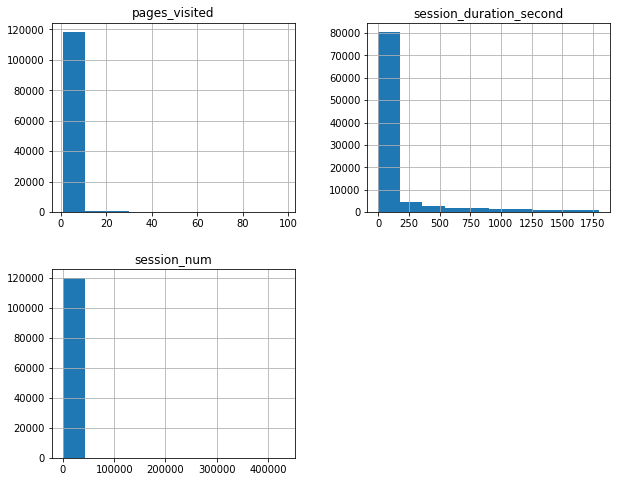

In [16]:
# histogram for continuous varibes
df.hist(column = continuous_col, figsize = (10,8))
# for these 3 variables, they are all 

Text(0.5,1,'Histogram of session_num')

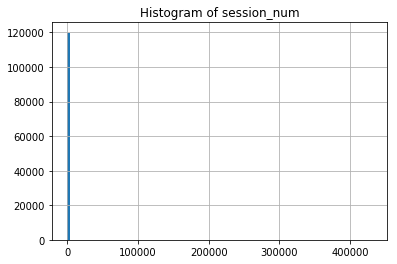

In [17]:
df['session_num'].hist(bins = 100)
plt.title('Histogram of session_num')

In [18]:
sum(df['session_num'] == 3)/len(df)

0.040091666666666664

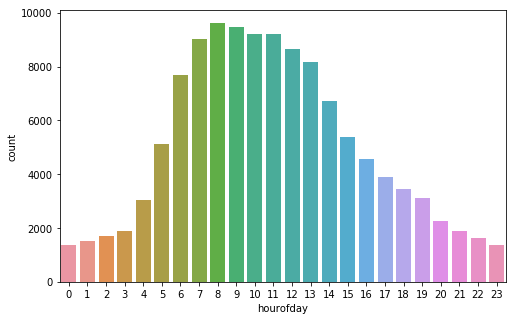

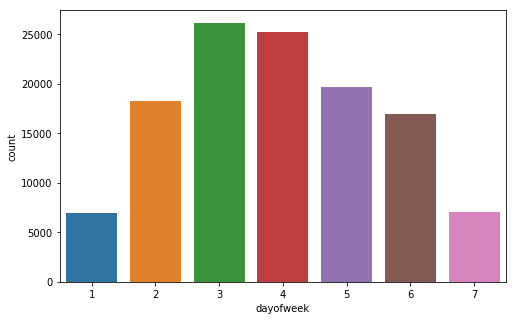

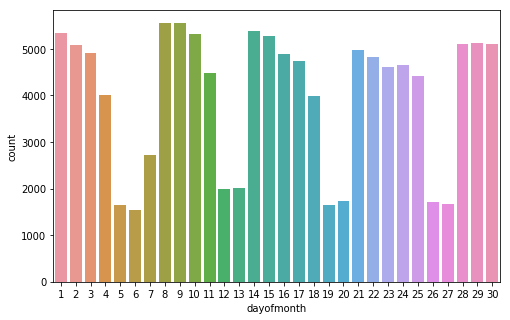

In [19]:
# what time do try visit the website 
time_columns = ['hourofday', 'dayofweek', 'dayofmonth']
for col in time_columns:
    plt.figure(figsize = (8,5))
    sns.countplot(x=col, data=df)

# people prefer to check our app during the woking time of the work days 

In [20]:
# total visitors
len(df['visitor_id'].unique())

114901

In [21]:
df.columns

Index(['visit_date', 'visit_start_timestamp', 'hourofday', 'dayofweek',
       'dayofmonth', 'visitor_id', 'session_num', 'device', 'operating_system',
       'browser', 'resolution_desc', 'geo_country', 'region', 'city',
       'language_desc', 'connection_type_desc', 'session_duration_second',
       'pages_visited', 'visitor_type', 'customer', 'employee_size',
       'revenue_size', 'year_in_business', 'industry', 'annual_revenue',
       'channel', 'search_type', 'referrer', 'landing_page', 'url_sequence',
       'care_article_id', 'care_article_title', 'care_user_click',
       'login_page_flag', 'qbo_existing_customer_type',
       'qbo_existing_customer_sku', 'qbo_signup_date', 'qbo_subscription_date',
       'qbo_cancel_date', 'qbo_sign_up', 'qbo_canceled'],
      dtype='object')

In [22]:
# where are they from
geo_columns = ['geo_country', 'region', 'city']
len(df[df['geo_country'] == 'usa'])/len(df) * 100

87.37833333333333

In [23]:
df_usa_count = df[df['geo_country'] == 'usa'][['region', 'visit_date']].groupby(['region']).count().reset_index()

In [24]:
df_usa_count['region'] = df_usa_count['region'].str.upper()

In [25]:
import plotly.express as px

fig = px.choropleth(locations=list(df_usa_count['region']), locationmode="USA-states", 
                    color=list(df_usa_count['visit_date']), scope="usa")
fig.show()
# most of usa visitors are from california, taxes and florida 

In [26]:
# what kind of devices
dev_column = ['device', 'operating_system']
df.groupby(dev_column).count()['visit_date']

device   operating_system
Desktop  OS                  26320
         Windows             76929
Mobile   Android              3485
         Mobile Linux            1
         Windows                 1
         iOS                  6925
Name: visit_date, dtype: int64

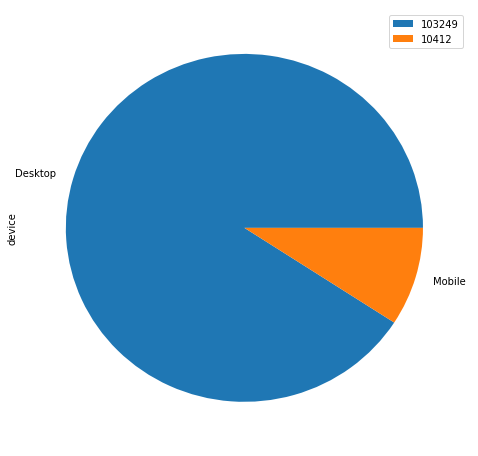

In [27]:
df['device'].value_counts().plot.pie(figsize = (8,8))
plt.legend(list(df['device'].value_counts()))

In [28]:
len(df[(df['browser'] == 'Chrome')])/len(df)

0.7150333333333333

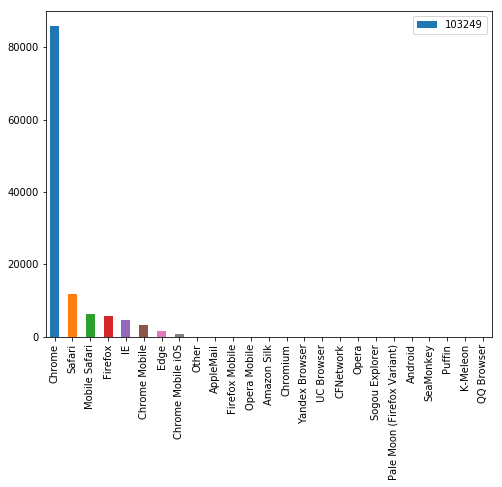

In [29]:
df['browser'].value_counts().plot.bar(figsize = (8,6))
plt.legend(list(df['device'].value_counts()))

In [30]:
df[df['device'] == 'Mobile'].groupby(['device', 'operating_system', 'browser']).count()['visitor_id']/10412

device  operating_system  browser          
Mobile  Android           Amazon Silk          0.000576
                          Android              0.000192
                          Chrome               0.012197
                          Chrome Mobile        0.316174
                          Firefox Mobile       0.002209
                          Mobile Safari        0.001056
                          Opera                0.000096
                          Opera Mobile         0.001825
                          Puffin               0.000096
                          UC Browser           0.000288
        Mobile Linux      Safari               0.000096
        Windows           Chrome Mobile        0.000096
        iOS               Chrome Mobile iOS    0.063869
                          Mobile Safari        0.600557
                          Safari               0.000672
Name: visitor_id, dtype: float64

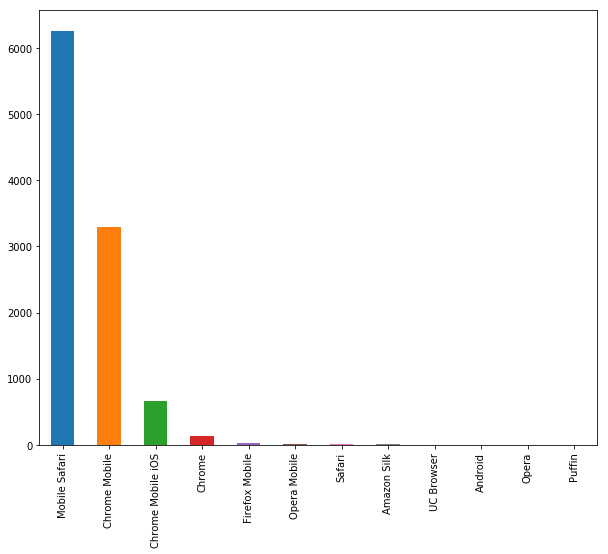

In [31]:
df['browser'][df['device'] == 'Mobile'].value_counts().plot.bar(figsize = (10,8))

In [32]:
len(df[df['browser'] == 'Chrome'])/len(df) * 100

71.50333333333333

In [33]:
df['language_desc_processed'] = df['language_desc'].apply(lambda x: str(x).split(' ')[0])

In [34]:
len(df[df['language_desc_processed'] == 'English'])/len(df) * 100

98.46083333333333

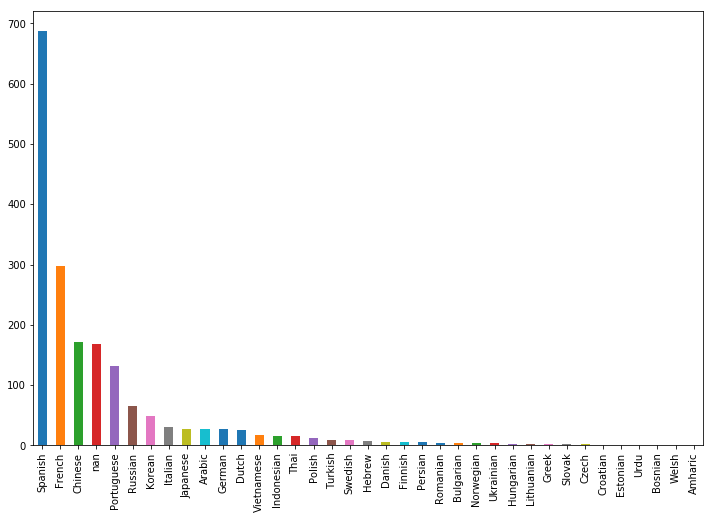

In [35]:
df['language_desc_processed'][df['language_desc_processed']!='English'].value_counts().plot.bar(figsize = (12,8))

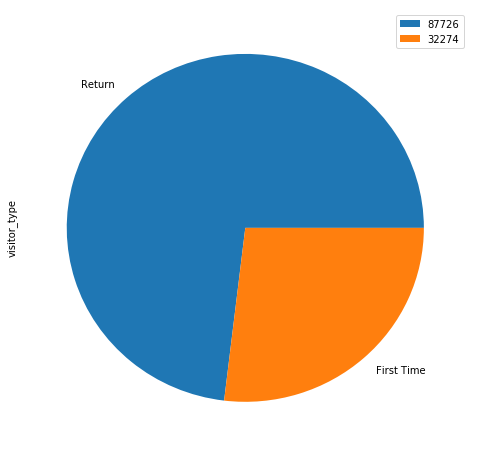

In [36]:
df['visitor_type'].value_counts().plot.pie(figsize = (8,8))
plt.legend(list(df['visitor_type'].value_counts()))

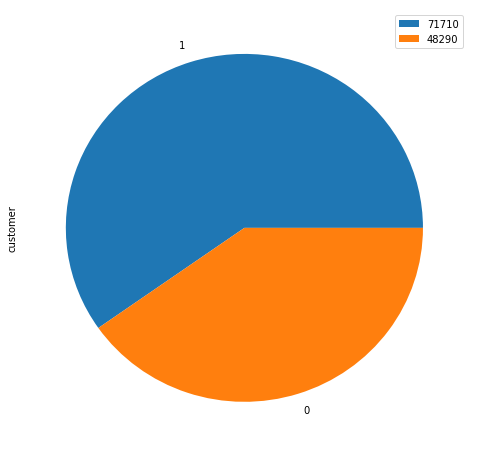

In [37]:
df['customer'].value_counts().plot.pie(figsize = (8,8))
plt.legend(list(df['customer'].value_counts()))

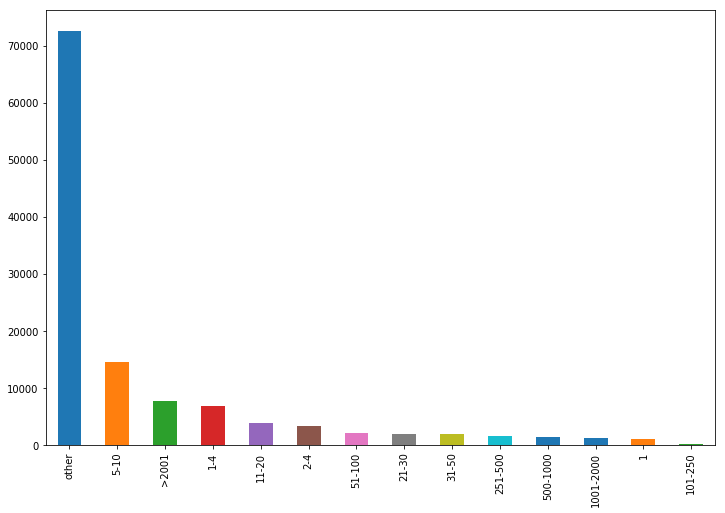

In [38]:
df['employee_size'].value_counts().plot.bar(figsize = (12,8))

In [39]:
df['employee_size'].unique()

array(['5-10', '1-4', 'other', '11-20', '51-100', '>2001', '251-500',
       '500-1000', '21-30', '31-50', '2-4', '1001-2000', '1', '101-250'],
      dtype=object)

In [40]:
mini_size = ['1', '2-4', '1-4']
small_medium = ['11-20', '21-30', '31-50']
medium  = ['101-250', '251-500', '500-1000']

def company_size(num):
    if num in mini_size:
        return '1-4'
    if num in small_medium:
        return '11-50'
    if num in medium:
        return '101-1000'
    else:
        return num

In [41]:
df['employee_size_processed'] = df['employee_size'].apply(company_size)

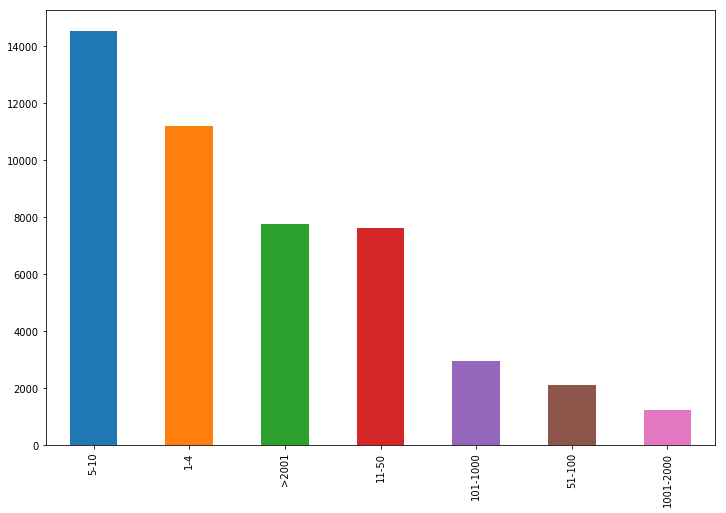

In [42]:
df['employee_size_processed'][df['employee_size_processed'] != 'other'].value_counts().plot.bar(figsize = (12,8))

In [43]:
df['employee_size_processed'][df['employee_size_processed'] != 'other'].unique()

array(['5-10', '1-4', '11-50', '51-100', '>2001', '101-1000', '1001-2000'],
      dtype=object)

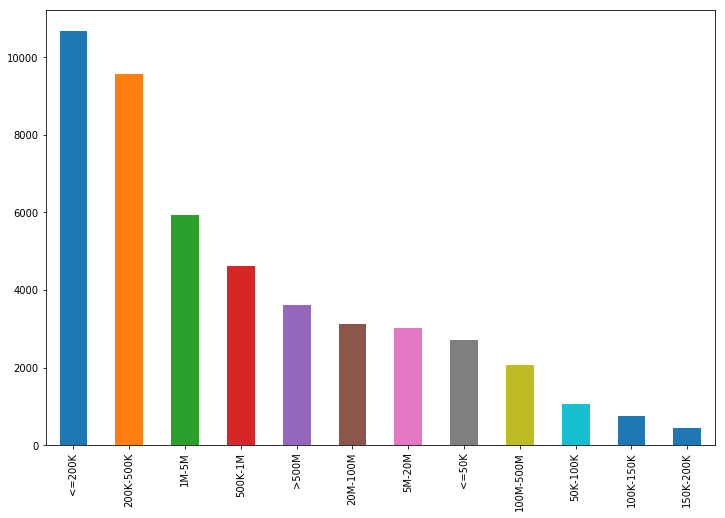

In [44]:
df['revenue_size'][df['revenue_size'] != 'other'].value_counts().plot.bar(figsize = (12,8))

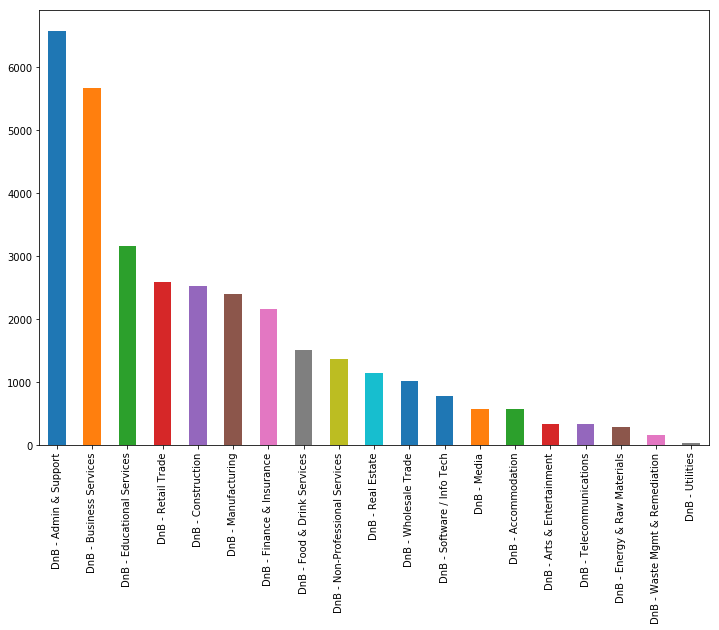

In [45]:
df['industry'][df['industry'] != 'other'].value_counts().plot.bar(figsize = (12,8))

In [46]:
len(df[df['industry'] == 'DnB - Business Services'])/len(df)

0.04725833333333333

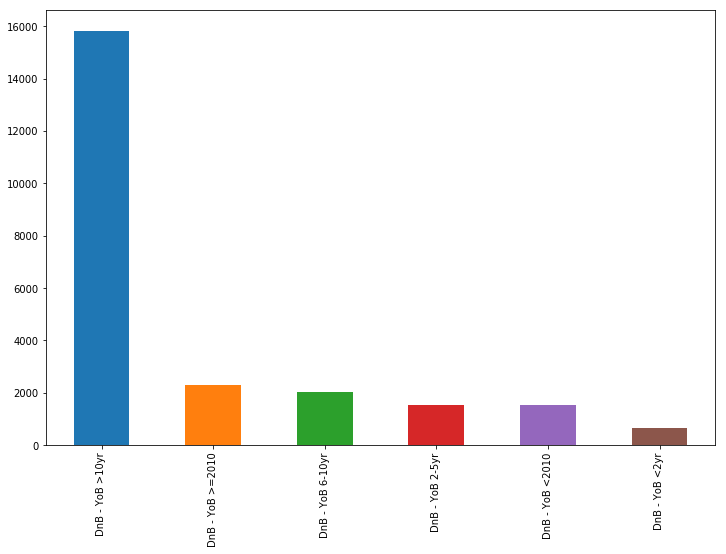

In [47]:
df['year_in_business'][df['year_in_business'] != 'other'].value_counts().plot.bar(figsize = (12,8))

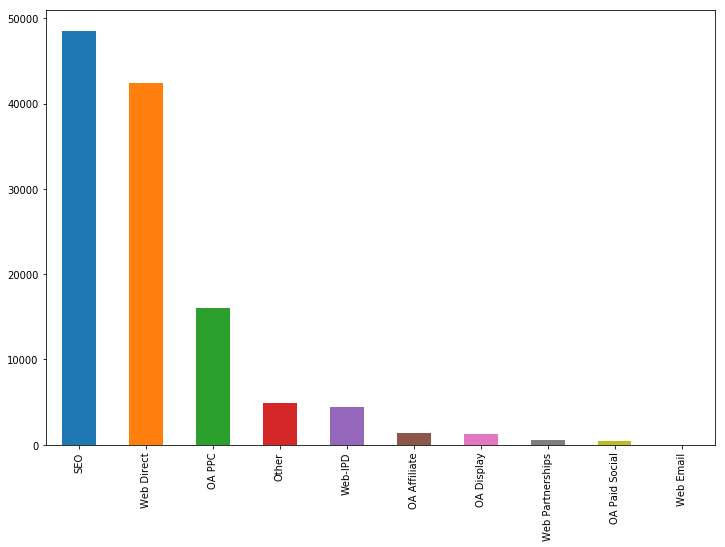

In [48]:
df['channel'][df['channel'] != 'other'].value_counts().plot.bar(figsize = (12,8))

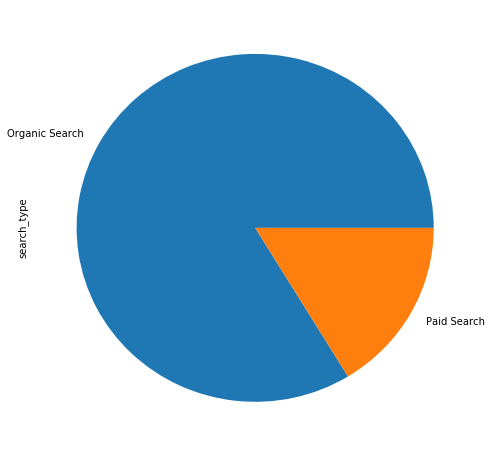

In [49]:
df['search_type'].value_counts().plot.pie(figsize = (8,8))

In [50]:
sum(df['landing_page'] == 'Homepage')/len(df)

0.3189416666666667

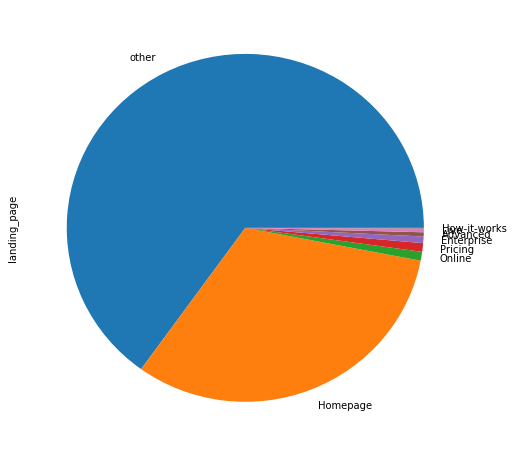

In [51]:
df['landing_page'].value_counts().plot.pie(figsize = (8,8))

In [52]:
df['referrer_new'] = df['referrer'].apply(lambda x: str(x).replace('https://', '').replace('www.', '').replace('.com', '').replace('http://', ''))
df['referrer_new'] = df['referrer_new'].apply(lambda x: x.replace('/', ' ').replace('.', ' ').replace('  ', ' '))
def google_bing(link):
    if 'google' in link:
            return 'google'
    if 'bing' in link:
        return 'bing'
    if 'intuit' in link:
        return 'intuit'
    else:
        return link
    
df['referrer_new'] = df['referrer_new'].apply(google_bing)
    
        

In [53]:
df['referrer_new'].value_counts()['google']

46136

In [54]:
sum(df['referrer_new'] == 'google')/len(df)

0.3844666666666667

In [55]:
sum(df['referrer_new'] == 'intuit')/len(df)

0.13179166666666667

In [56]:
from wordcloud import WordCloud
comment_words = '' 

for val in df.referrer_new: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
        if 'google' in tokens[i]:
            tokens[i] = 'google'
      
    comment_words += " ".join(tokens)+" "
    


In [57]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = ['nan', 'https://', 'www', 'com', 'http'], 
                min_font_size = 10).generate(comment_words) 

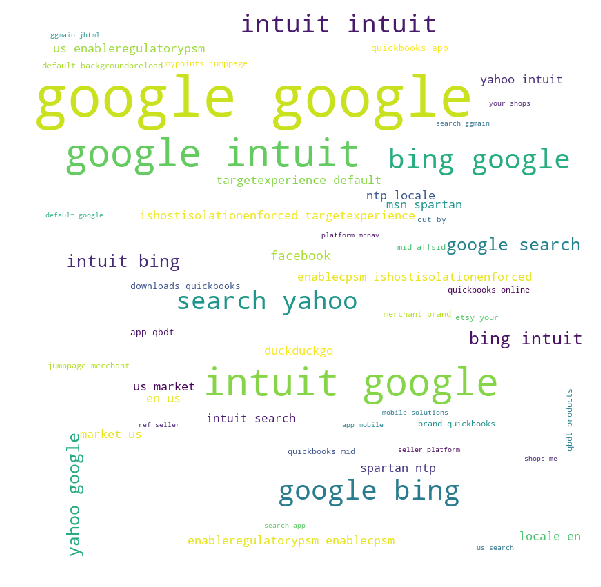

In [58]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [59]:
df['care_user_click'] = df['care_user_click'].fillna('N')

In [60]:
sum(df['care_user_click'] == 'Y')/len(df)

0.3738916666666667

In [61]:
len(df[df['login_page_flag'] == 1])/len(df)

0.43083333333333335

## User segmentation

In [62]:
df['qbo_existing_customer_type'] = df['qbo_existing_customer_type'].str.replace('Trial', 'Free')

In [63]:
df_free = df[df['qbo_existing_customer_type'] == 'Free']

In [64]:
df['group'] = np.nan

In [65]:
df['group'][df['qbo_existing_customer_type'] == 'Free'] = 'Free'

In [66]:
df_paid = df[(df['qbo_existing_customer_sku'].isnull() == False) & (df['qbo_existing_customer_type'] != 'Free')]

In [67]:
df['group'][(df['qbo_existing_customer_sku'].isnull() == False) & (df['qbo_existing_customer_type'] != 'Free')] = 'Paid'

In [68]:
df_random_check = df[(df['qbo_existing_customer_type'].isnull()) & (df['visitor_type'] == 'First Time') & (df['qbo_existing_customer_type'] != 'Free')]

In [69]:
df['group'] [(df['qbo_existing_customer_type'].isnull()) & (df['visitor_type'] == 'First Time') & (df['qbo_existing_customer_type'] != 'Free')]= 'Random'

In [70]:
df_attention_check = df[(df['qbo_existing_customer_type'].isnull()) & (df['visitor_type'] == 'Return') & (df['qbo_existing_customer_type'] != 'Free')]

In [71]:
df['group'][(df['qbo_existing_customer_type'].isnull()) & (df['visitor_type'] == 'Return') & (df['qbo_existing_customer_type'] != 'Free')] = 'Attention'

In [72]:
len(df_free) + len(df_attention_check) + len(df_random_check) + len(df_paid)

120000

In [73]:
len(df)

120000

In [74]:
df.columns

Index(['visit_date', 'visit_start_timestamp', 'hourofday', 'dayofweek',
       'dayofmonth', 'visitor_id', 'session_num', 'device', 'operating_system',
       'browser', 'resolution_desc', 'geo_country', 'region', 'city',
       'language_desc', 'connection_type_desc', 'session_duration_second',
       'pages_visited', 'visitor_type', 'customer', 'employee_size',
       'revenue_size', 'year_in_business', 'industry', 'annual_revenue',
       'channel', 'search_type', 'referrer', 'landing_page', 'url_sequence',
       'care_article_id', 'care_article_title', 'care_user_click',
       'login_page_flag', 'qbo_existing_customer_type',
       'qbo_existing_customer_sku', 'qbo_signup_date', 'qbo_subscription_date',
       'qbo_cancel_date', 'qbo_sign_up', 'qbo_canceled',
       'language_desc_processed', 'employee_size_processed', 'referrer_new',
       'group'],
      dtype='object')

In [75]:
group = dict((round(df.groupby(['group']).count()['visit_date']/len(df)*100, 2)))

In [76]:
group

{'Attention': 18.7, 'Free': 14.9, 'Paid': 40.34, 'Random': 26.06}

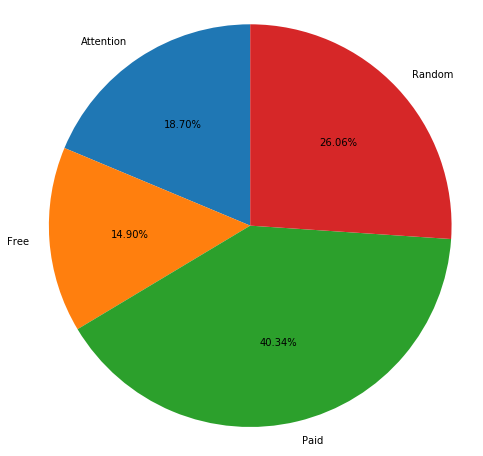

In [77]:
labels = group.keys()
sizes = group.values()

fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.pie(sizes,  labels=labels, autopct='%1.2f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [78]:
df.groupby('group').median()[['session_num', 'session_duration_second', 'pages_visited']].reset_index()

group  session_num  session_duration_second  pages_visited
0  Attention            5                     27.0              1
1       Free           54                     22.0              2
2       Paid           50                     17.0              2
3     Random            1                      6.0              1

In [79]:
df.groupby('group').mean()[['session_num', 'session_duration_second', 'pages_visited']].reset_index()

group  session_num  session_duration_second  pages_visited
0  Attention  2088.283837               196.612540       2.156643
1       Free   134.639333               149.346079       1.891599
2       Paid   122.397426               139.424343       1.752236
3     Random     1.000000               101.131574       2.173793

In [80]:
df.columns

Index(['visit_date', 'visit_start_timestamp', 'hourofday', 'dayofweek',
       'dayofmonth', 'visitor_id', 'session_num', 'device', 'operating_system',
       'browser', 'resolution_desc', 'geo_country', 'region', 'city',
       'language_desc', 'connection_type_desc', 'session_duration_second',
       'pages_visited', 'visitor_type', 'customer', 'employee_size',
       'revenue_size', 'year_in_business', 'industry', 'annual_revenue',
       'channel', 'search_type', 'referrer', 'landing_page', 'url_sequence',
       'care_article_id', 'care_article_title', 'care_user_click',
       'login_page_flag', 'qbo_existing_customer_type',
       'qbo_existing_customer_sku', 'qbo_signup_date', 'qbo_subscription_date',
       'qbo_cancel_date', 'qbo_sign_up', 'qbo_canceled',
       'language_desc_processed', 'employee_size_processed', 'referrer_new',
       'group'],
      dtype='object')

In [81]:
df.groupby(['group'])['language_desc_processed', 'employee_size_processed', 'referrer_new', 'care_article_id',
                     'care_article_title', 'care_user_click','landing_page'].agg(pd.Series.mode)

language_desc_processed employee_size_processed referrer_new  \
group                                                                    
Attention                 English                   other       google   
Free                      English                   other       google   
Paid                      English                   other       google   
Random                    English                   other          nan   

          care_article_id                                 care_article_title  \
group                                                                          
Attention      ooxbu36397                     How to fix Error H202 and H505   
Free           ooxbu36397        What are usage limits in QuickBooks Online?   
Paid           ooxbu36397        What are usage limits in QuickBooks Online?   
Random         ooxbu36397  View your paychecks and W-2s online in QuickBo...   

          care_user_click landing_page  
group                                   
Attention               N        other  
Free                    Y        other  
Paid                    Y        other  
Random                  N        other

In [82]:
df.groupby(['group'])['browser', 'resolution_desc', 'geo_country', 'region', 'city',
                     'device', 'operating_system','language_desc', 'connection_type_desc'].agg(pd.Series.mode)

browser resolution_desc geo_country region           city   device  \
group                                                                          
Attention  Chrome     1920 x 1080         usa     ca  mountain view  Desktop   
Free       Chrome     1920 x 1080         usa     ca  mountain view  Desktop   
Paid       Chrome     1920 x 1080         usa     ca          miami  Desktop   
Random     Chrome      1024 x 768         usa     ca    santa clara  Desktop   

          operating_system            language_desc connection_type_desc  
group                                                                     
Attention          Windows  English (United States)             LAN/Wifi  
Free               Windows  English (United States)             LAN/Wifi  
Paid               Windows  English (United States)             LAN/Wifi  
Random             Windows  English (United States)             LAN/Wifi

In [83]:
df.groupby(['group'])['revenue_size', 'year_in_business', 'industry', 'annual_revenue',
       'channel', 'search_type',  'landing_page', 'referrer'].agg(pd.Series.mode)

revenue_size year_in_business industry annual_revenue     channel  \
group                                                                         
Attention        other            other    other          other         SEO   
Free             other            other    other          other         SEO   
Paid             other            other    other          other         SEO   
Random           other            other    other          other  Web Direct   

              search_type landing_page                 referrer  
group                                                            
Attention  Organic Search        other  https://www.google.com/  
Free       Organic Search        other  https://www.google.com/  
Paid       Organic Search        other  https://www.google.com/  
Random     Organic Search        other  https://www.google.com/

In [84]:
df.groupby(['group'])['channel', 'care_article_title', 'care_user_click'].agg(pd.Series.mode).reset_index()

group     channel                                 care_article_title  \
0  Attention         SEO                     How to fix Error H202 and H505   
1       Free         SEO        What are usage limits in QuickBooks Online?   
2       Paid         SEO        What are usage limits in QuickBooks Online?   
3     Random  Web Direct  View your paychecks and W-2s online in QuickBo...   

  care_user_click  
0               N  
1               Y  
2               Y  
3               N

## Feature Engineer

In [85]:
def process_operat_system(v):
    if v in ['Chrome OS', 'Not Specified', 'Symbian', 'Mobile Linux', 'Tizen']:
        return 'Other'
    else:
        return v
    
df['processed_operating_system'] = df['operating_system'].apply(process_operat_system)

In [86]:
rare_values = list(df['browser'].value_counts()[df['browser'].value_counts()<1000].index)
def process_browser(v):
    if v in rare_values:
        return 'other'
    else:
        return v
    
df['processed_browser'] = df['browser'].apply(process_browser)

In [87]:
rare_values = list(df['geo_country'].value_counts()[df['geo_country'].value_counts()<1000].index)
def process_geo_country(v):
    if v in rare_values:
        return 'other'
    else:
        return v
    
df['processed_geo_country'] = df['geo_country'].apply(process_geo_country)

In [88]:
rare_values = list(df['language_desc_processed'].value_counts()[df['language_desc_processed'].value_counts()<1000].index)
def process_language(v):
    if v in rare_values:
        return 'other'
    else:
        return v
    
df['processed_language_desc'] = df['language_desc_processed'].apply(process_language)

In [89]:
rare_values = list(df['referrer_new'].value_counts()[df['referrer_new'].value_counts()<1000].index)
def process_referrer_new(v):
    if v in rare_values:
        return 'other'
    else:
        return v
    
df['processed_referrer_new'] = df['referrer_new'].apply(process_referrer_new)

In [90]:
features = [
            'hourofday', 'dayofweek','dayofmonth', 'session_num', 'device', 'processed_operating_system', 
            'processed_browser','processed_geo_country','processed_language_desc', 'connection_type_desc',
    'session_duration_second', 'pages_visited', 'visitor_type', 'employee_size_processed', 'revenue_size',
    'year_in_business', 'channel', 'processed_referrer_new', 'landing_page', 'care_user_click',
    'login_page_flag'
]

In [186]:
df_random = df[(df['qbo_signup_date'].isnull())]

In [187]:
attention_user = list(df['visitor_id'][df['qbo_signup_date'] == df['visit_date']])
df_attention = df[(df['visitor_id'].isin(attention_user))]

In [188]:
df_random['predict'] = 0

In [189]:
df_attention['predict'] = 1

In [190]:
df_new = df_attention.append(df_random)

In [191]:
percent_missing = df_new[features].isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})

In [192]:
missing_value_df

percent_missing
hourofday                          0.000
dayofweek                          0.000
dayofmonth                         0.000
session_num                        0.000
session_duration_second           12.175
pages_visited                      0.000
care_user_click                    0.000
login_page_flag                    0.000

In [193]:
df_new['device'].fillna(df_new['device'].mode()[0], inplace=True)
df_new['session_duration_second'].fillna(df_new['session_duration_second'].mean(), inplace=True)
df_new['year_in_business'].fillna(df_new['year_in_business'].mode()[0], inplace=True)

In [194]:
df_new['care_user_click'] = df_new['care_user_click'].apply(lambda x: 1 if x == 'Y' else 0)

In [195]:
# categorical_features = [ 'device', 'processed_operating_system', 
#             'processed_browser','processed_geo_country','processed_language_desc', 'connection_type_desc','employee_size_processed', 'revenue_size',
#     'year_in_business', 'channel', 'processed_referrer_new', 'landing_page', 'visitor_type']
# for feature in categorical_features:
#     features.remove(feature)
# numerical_features = features

In [196]:
df_cate = pd.get_dummies(df_new[categorical_features])

In [230]:
y = df_new['predict']

In [231]:
df_new['predict'].value_counts()

0    53713
1       50
Name: predict, dtype: int64

In [232]:
X = pd.concat([df_cate, df_new[numerical_features]], axis=1)

In [233]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [239]:
X_train = X_train[y_train == 1].append(X_train[y_train == 0].sample(500, random_state = 0))
y_train = y_train[y_train == 1].append(y_train[y_train == 0].sample(500, random_state = 0))

Text(0.5,1,'Heatmap of Correlation')

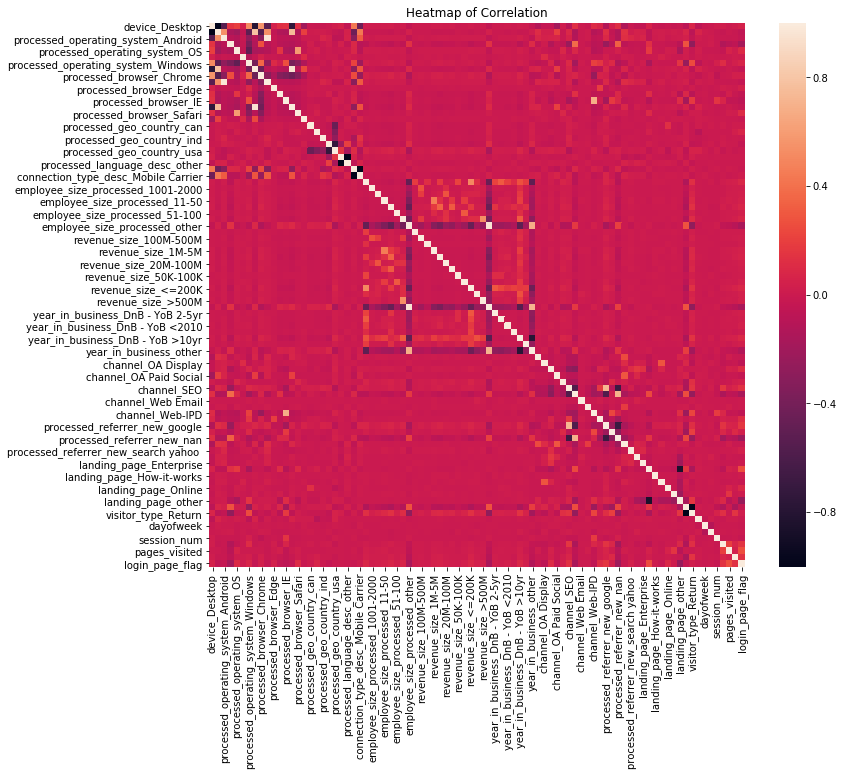

In [240]:
corr = X.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

## Machine Learning model training 

In [241]:
class ML_models():
 
    def __init__(self, x_train, y_train, x_test, y_test, model, model_name, model_param):
        
        self.x_train = x_train          # x train
        self.y_train = y_train          # y train
        self.x_test = x_test            # x test
        self.y_test = y_test            # y test
        self.model = model              # model name in Python
        self.model_name = model_name    # model name save in models/
        self.model_param = model_param  # hyperparameter in model
        
    def train(self):
        '''train the model'''
        
        global model
        model = self.model + "()"
        model = eval(model)
        
        # use GridSearchCV tuning the hyperparameter
        model_grid = GridSearchCV(estimator = model, 
                                  param_grid = self.model_param, 
                                  scoring= 'recall', # multiclass classification
                                  n_jobs=4,
                                  cv=5)
        
        # record the start tuning time
        start_time_grid = time.time()
        print("Start training...")
        
        # start tuning model 
        model_grid.fit(self.x_train, self.y_train)
        
        # calculate total GridSearchCV time
        total_time_grid = time.time() - start_time_grid
        
        print("The total GridSearchCV training time:", round(total_time_grid, 5))

        print("The best hyperparameter:", model_grid.best_params_) 
        print("The best score of GridSearchCV training:", round(model_grid.best_score_, 5))
        print("<--------------------------------------->")
        
        # set the best tuning model parameter
        model.set_params(**model_grid.best_params_)
        
        # record the start train time
        start_time_train = time.time()
          
        # fit the model using the whole data set 
        model.fit(self.x_train, self.y_train)
        
        # save model
        dump(model, 'models/' + self.model_name + '.joblib') 
        
        # calculate the mean and std of the cv error
        model_score = cross_val_score(model, self.x_train, self.y_train,
                                      cv = 5, 
                                      # using mean_squared_error if it is regression. 
                                      scoring = 'recall')
        
        # calculate total re-train time
        time_retrain = time.time() - start_time_train
        
        print("The re-train time:", round(time_retrain, 5))
        print("The mean of CV score of the best training model:", round(model_score.mean(), 5))
        print("The std of CV score of the best training model:", round(model_score.std(), 5))
        
        return model_score.mean(), model_score.std(), model

In [242]:
logistic_reg_params = {"penalty": ["l2"],                       # penalization
                       "C": [1, 2, 3],                          
                       # inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
                       "tol": [1e-4, 1e-5],                     # tolerance for stopping criteria
                       "solver": ["newton-cg", "lbfgs", "sag"], # only ‘newton-cg’, ‘sag’, and ‘lbfgs’ handle multinomial loss and only handle L2 penalty
                       "multi_class": ["multinomial"],          # here is multi-class
                       "random_state": [0]}

In [243]:
logistic_reg = ML_models(X_train, 
                         y_train, 
                         X_test, 
                         y_test, 
                         "LogisticRegression",
                         "logistic_reg",
                         model_param = logistic_reg_params)  

In [244]:
logistic_reg_train = logistic_reg.train()

Start training...
The total GridSearchCV training time: 10.15225
The best hyperparameter: {'C': 1, 'multi_class': 'multinomial', 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg', 'tol': 0.0001}
The best score of GridSearchCV training: 0.475
<--------------------------------------->
The re-train time: 1.42385
The mean of CV score of the best training model: 0.475
The std of CV score of the best training model: 0.12247


In [285]:
from sklearn.ensemble import RandomForestClassifier
random_forest_params = {'bootstrap': [True, False],
 'max_depth': [10, 40, 50, 90, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 8,10],
 'n_estimators': [50, 100, 200, 300, 400, 500]}

In [286]:
random_forest = ML_models(X_train, 
                         y_train, 
                         X_test, 
                         y_test, 
                         "RandomForestClassifier",
                         "random_forest",
                         model_param = random_forest_params)  

In [287]:
from sklearn.ensemble import RandomForestClassifier
random_forest_train = random_forest.train()

Start training...
The total GridSearchCV training time: 531.54589
The best hyperparameter: {'bootstrap': False, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
The best score of GridSearchCV training: 0.6
<--------------------------------------->
The re-train time: 0.73298
The mean of CV score of the best training model: 0.55
The std of CV score of the best training model: 0.12748


## Result Analysis

In [288]:
reg_model = load('models/logistic_reg.joblib')
tree_model = load('models/random_forest.joblib')

In [289]:
np.mean(reg_model.predict(X_test) == y_test)

0.9848414395982517

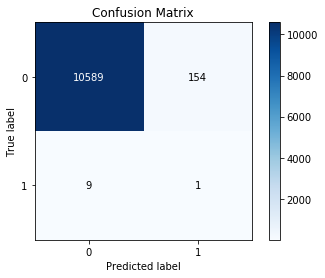

In [290]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, reg_model.predict(X_test))

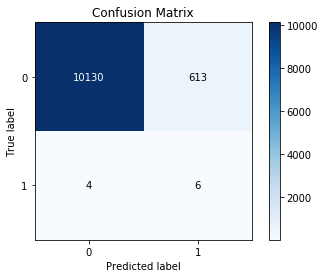

In [297]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [296]:
y_pred = tree_model.predict_proba(X_test)[:,1] > 0.2

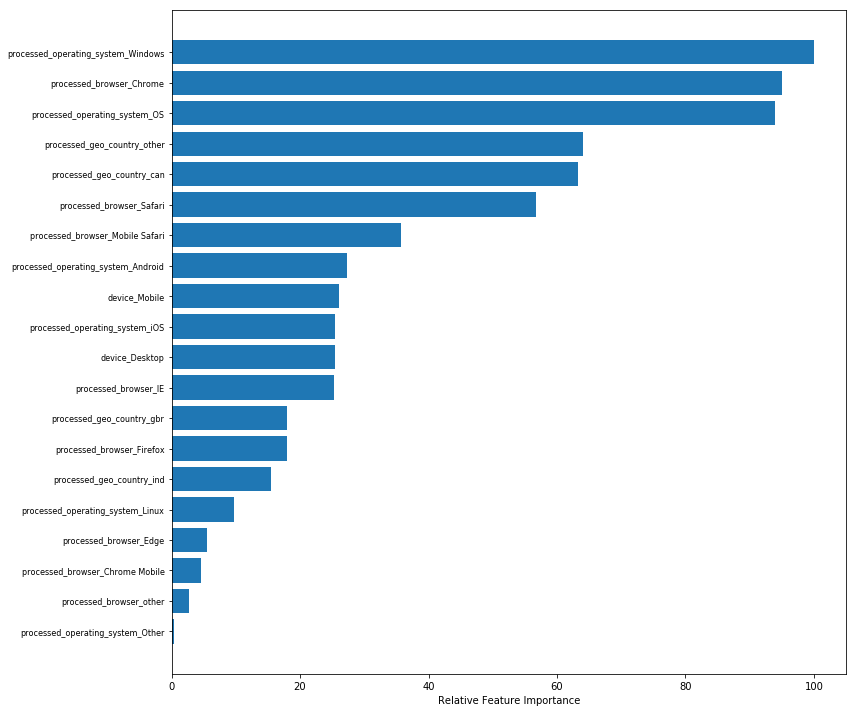

In [262]:
feature_importance = abs(tree_model.feature_importances_)[:20]
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5


featfig = plt.figure(figsize = (12,10))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx][:20], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()